# Первичный анализ данных и визуализации

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Первичный анализ данных, pandas и графики

**pandas** - библиотека для работы с данными в табличном формате   

+ будем работать с датасетом [Student Performance](http://archive.ics.uci.edu/ml/datasets/Student+Performance#)
+ постараемся предсказать итоговую оценку по математике (G3) по разным другим признакам 



### Attributes


1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid**- extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)



### Target:
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

### Посмотрим на данные

In [2]:
import pandas as pd

In [3]:
# загружаем датасет с оценками по математике
# не забываем указать правильный разделитель
data = pd.read_csv('https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv', delimiter=';')

In [4]:
# посмотрим на первые 15 строк таблицы
# каждая строка - объект
# столбцы - признаки
data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### Удаление столбцов, добавление столбцов, сортировка

In [5]:
# убираем столбцы G1 и G2, т.к. нас интересует только G3
data = data.drop(columns=['G1', 'G2'])

In [6]:
# добавить столбец
data['MeanAlc'] = (data['Walc']+data['Dalc'])/2

In [7]:
data.head(16)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,MeanAlc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,6,1.0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,6,1.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,10,2.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,1.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,10,1.5
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,10,15,1.5
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,11,1.0
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,6,6,1.0
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,19,1.0
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,15,1.0


In [8]:
data = data.drop(columns=['MeanAlc'])

In [9]:
# отсортируем по оценкам по убыванию
sorted_data = data.sort_values(by='G3', ascending=False)

In [10]:
# первые 5 учеников
sorted_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
47,GP,M,16,U,GT3,T,4,3,health,services,...,yes,no,4,2,2,1,1,2,4,20
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,yes,no,3,5,2,1,1,3,10,19
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,yes,no,5,5,3,1,1,4,6,19
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,yes,no,4,3,3,1,2,2,5,19
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,19


In [11]:
# последние 5 учеников
sorted_data.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
160,GP,M,17,R,LE3,T,2,1,at_home,other,...,yes,yes,3,3,2,2,2,5,0,0
162,GP,M,16,U,LE3,T,1,2,other,other,...,no,no,4,4,4,2,4,5,0,0
168,GP,F,16,U,GT3,T,2,2,other,other,...,yes,no,5,1,5,1,1,4,0,0
367,MS,F,17,R,GT3,T,1,1,other,services,...,yes,yes,5,2,1,1,2,1,0,0
150,GP,M,18,U,LE3,T,1,1,other,other,...,yes,yes,2,3,5,2,5,4,0,0


### Индексация

In [12]:
# индексация - строки
# data.loc[0]
data.loc[5:10]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,yes,no,3,3,3,1,2,2,0,9


In [13]:
# индексация - столбцы
# data['G3']
data[['school', 'address']] # несколько столбцов

,school,address
0,GP,U
1,GP,U
2,GP,U
3,GP,U
4,GP,U
...,...,...
390,MS,U
391,MS,U
392,MS,R
393,MS,R


In [14]:
# и то, и другое
data['G3'].loc[0]
# data.loc[0]['G3'] # так тоже можно

6

In [15]:
# индексация по условию
# средняя оценка людей, состоящих в отношениях
data[data['romantic'] == 'yes']['G3'].mean()

9.575757575757576

In [16]:
len(data[data['romantic'] == 'yes'])

132

In [17]:
# и не состоящих
data[data['romantic'] == 'no']['G3'].mean()

10.836501901140684

In [18]:
len(data[data['romantic'] == 'no'])

263

In [19]:
data['romantic'] == 'no'

0       True
1       True
2       True
3      False
4       True
       ...  
390     True
391     True
392     True
393     True
394     True
Name: romantic, Length: 395, dtype: bool

In [20]:
# несколько условий
# есть отношения и хорошие отношения в семье
data[(data['romantic'] == 'yes') & (data['famrel'] >= 4)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
14,GP,M,15,U,GT3,A,2,2,other,other,...,yes,yes,4,5,2,1,1,3,0,16
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,yes,yes,4,4,5,5,5,5,16,11
32,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,yes,yes,4,5,2,1,1,5,0,16
41,GP,M,15,U,LE3,T,4,4,teacher,other,...,yes,yes,5,4,3,2,4,5,8,12
45,GP,F,15,U,LE3,A,4,3,other,other,...,yes,yes,5,2,2,1,1,5,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,MS,M,18,R,LE3,T,1,2,at_home,services,...,yes,yes,4,3,3,2,3,3,3,12
376,MS,F,20,U,GT3,T,4,2,health,other,...,yes,yes,5,4,3,1,1,3,4,15
378,MS,F,18,U,GT3,T,3,3,other,other,...,yes,yes,4,1,3,1,2,1,0,15
381,MS,M,18,R,GT3,T,2,1,other,other,...,yes,yes,4,4,3,1,3,5,5,7


In [21]:
# есть отношения или хорошие отношения в семье
data[(data['romantic'] == 'yes') | (data['famrel'] >= 4)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,0,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,0,8
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,7


### Задание
Найти средний возраст тех, кто много пьет (Dalc и Walc >= 4) и тех, кто мало пьёт (Dalc и Walc = 1)


In [22]:
# много
data[(data['Dalc'] >= 4) & (data['Walc'] >= 4)]['age'].mean()

17.1875

In [23]:
# мало
data[(data['Dalc'] == 1) & (data['Walc'] == 1)]['age'].mean()

16.453333333333333

## Типы признаков и их статистические характеристики

In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
# названия столбцов
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [26]:
# количестов объектов, названия и типы признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [27]:
# узнать разные статистические характеристики числовых признаков 
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


#### Визуализация распределения значений для численных переменных

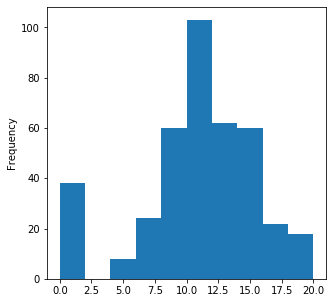

In [28]:
# гистограмма
data['G3'].plot(kind='hist', figsize=(5, 5))

In [29]:
# то же самое для бинарных и категориальных признаков
# в include пишем нужные типы переменных
data.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


Для категориальных (тип object) и булевых (тип bool) признаков можно воспользоваться методом value_counts.

In [30]:
# узнаем какие профессии родителей встречаются чаще всего
data['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [31]:
# то же самое, но в % соотношении
data['Mjob'].value_counts(normalize=True)

other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64

In [32]:
data['Fjob'].value_counts(normalize=True)

other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64

#### Визуализация распределения значений для категориальных переменных

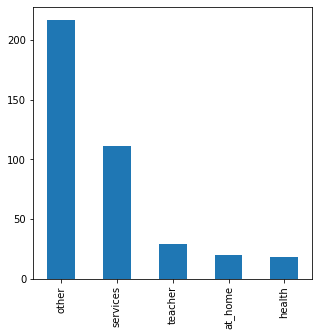

In [33]:
# bar plot
data['Fjob'].value_counts().plot(kind='bar', figsize=(5,5))

### Сводные таблицы

In [34]:
# pd.crosstab(data['sex'], data['romantic'])
pd.crosstab(data['sex'], data['romantic'], normalize=True)

romantic,no,yes
sex,,
F,0.326582,0.200000
M,0.339241,0.134177


In [35]:
# сколько мальчиков и девочек среду тех, кто получил худшие оценки
worst_grades = data[data['G3'] <= 7]
pd.crosstab(worst_grades['G3'], worst_grades['sex'], normalize=True)

sex,F,M
G3,,
0,0.328571,0.214286
4,0.014286,0.000000
5,0.042857,0.057143
6,0.185714,0.028571
7,0.057143,0.071429


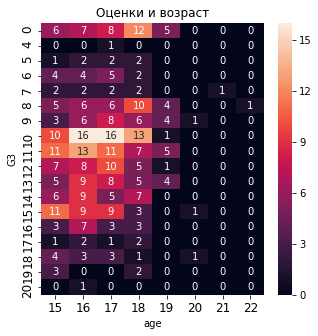

In [36]:
# то же самое в виде очень красивого и очень разноцветного графика

table = pd.crosstab(data['G3'], data['age'])

plt.figure(figsize=(5, 5)) # регулируем размер графика

sns.heatmap(table, # таблица
            xticklabels=table.columns, # названия столбцов
            yticklabels=table.index, # названия колонок
           annot=True) # подписать значения на цветных квадратиках
           
# добавляем название
plt.title('Оценки и возраст', fontsize=12)

# делаем шрифт побольше
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Вопросы**
+ Какой % учеников ни разу не пропускал занятия?
+ Какой % учеников проваливал экзамены хотя бы один раз?
+ Есть ли сильно пьющие ученики (Dalc или Walc 4 и больше) с очень высокими оценками (G3 >= 18)? Какая самая высокая оценка среди сильно пьющих учеников?
+ Есть ли состоящие в отношениях ученики с высокими оценками (G3 >= 18)? Какая самая высокая оценка среди учеников, состоящих в отношених?
+ Правда ли, что большинство людей с высшим баллом (G3 >= 18) пьют мало/не пьют (Dalc и Walc = 1)?

In [37]:
# какой % учеников ни разу не пропускал занятия?
data.absences.value_counts(normalize=True)[0]

0.2911392405063291

In [38]:
# Какой % учеников проваливал экзамены хотя бы один раз?
len(data[data['failures'] >= 1])/len(data)

0.21012658227848102

In [39]:
# Есть ли сильно пьющие ученики (Dalc или Walc 4 и больше) 
# с очень высокими оценками (G3 >= 18)? - да, 1
# Какая самая высокая оценка среди сильно пьющих учеников? - 18
drinkers = data[(data['Walc'] >= 4) | (data['Dalc'] >= 4)]

In [41]:
# сортируем  обратном порядке по индексу - это первая колонка, в ней записаны оценки
# вторая колонка - количество людей с этой оценкой
drinkers['G3'].value_counts().sort_index(ascending=False)

18     1
17     1
16     3
15     2
14     2
13     9
12     7
11     8
10    17
9      7
8     10
7      3
6      1
5      4
4      1
0      5
Name: G3, dtype: int64

In [75]:
# Есть ли состоящие в отношениях ученики с высокими оценками (G3 >= 18)? - да
# Какая самая высокая оценка среди учеников, состоящих в отношених? - 18
romance = data[data['romantic'] == 'yes']

In [76]:
# альтернативный способ узнать самую высокую оценку
romance['G3'].max()

18

In [77]:
# Правда ли, что большинство людей с высшим баллом (G3 >= 18) 
# пьют мало/не пьют (Dalc и Walc = 1)? - да
good_grades = data[data['G3'] >= 18]

In [78]:
non_drinkers = good_grades[(good_grades['Walc'] == 1) & (good_grades['Dalc'] == 1)]

In [79]:
# вычисляем долю непьющих людей среду всех получивших хорошие оценки - их 66%
len(non_drinkers)/len(good_grades)

0.6666666666666666

## Корреляции

In [81]:
# корреляция между признаками (только количественные)
data.corr()
# data.corr().abs() # абсолютные значения

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,0.163658,0.163438,0.070641,0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.161579
Medu,0.163658,1.000000,0.623455,0.171639,0.064944,0.236680,0.003914,0.030891,0.064094,0.019834,0.047123,0.046878,0.100285,0.217147
Fedu,0.163438,0.623455,1.000000,0.158194,0.009175,0.250408,0.001370,0.012846,0.043105,0.002386,0.012631,0.014742,0.024473,0.152457
traveltime,0.070641,0.171639,0.158194,1.000000,0.100909,0.092239,0.016808,0.017025,0.028540,0.138325,0.134116,0.007501,0.012944,0.117142
studytime,0.004140,0.064944,0.009175,0.100909,1.000000,0.173563,0.039731,0.143198,0.063904,0.196019,0.253785,0.075616,0.062700,0.097820
failures,0.243665,0.236680,0.250408,0.092239,0.173563,1.000000,0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,0.360415
famrel,0.053940,0.003914,0.001370,0.016808,0.039731,0.044337,1.000000,0.150701,0.064568,0.077594,0.113397,0.094056,0.044354,0.051363
freetime,0.016434,0.030891,0.012846,0.017025,0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,0.058078,0.011307
goout,0.126964,0.064094,0.043105,0.028540,0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,0.009577,0.044302,0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,0.196019,0.136047,0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,0.054660


**Задание** - нарисовать таблицу корреляции в виде очень красивого и очень разноцветного графика с подписями

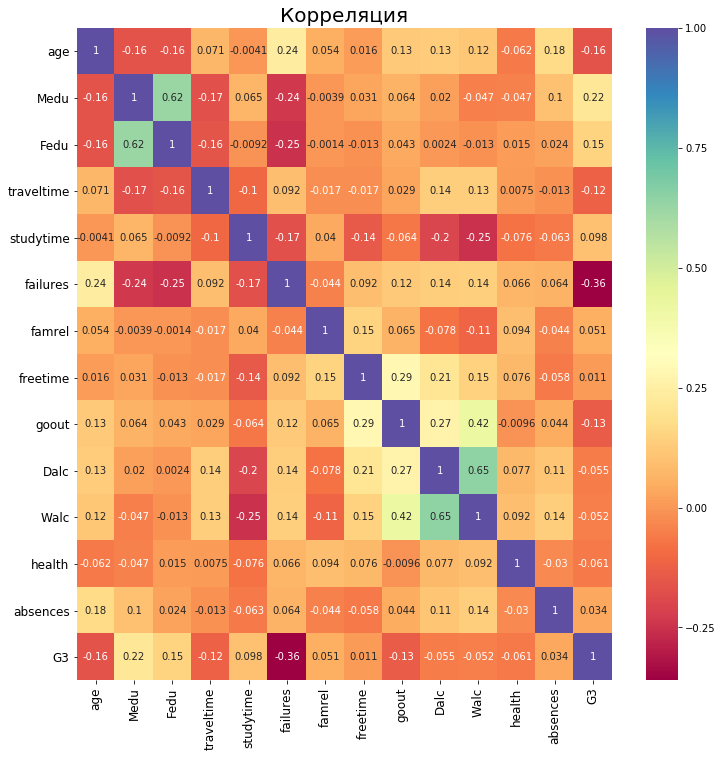

In [85]:
# то же самое в виде очень красивого и очень разноцветного графика
table = data.corr()

plt.figure(figsize=(12, 12)) # регулируем размер графика

sns.heatmap(table, # таблица
            xticklabels=table.columns, # названия столбцов
            yticklabels=table.index, # названия колонок
           annot=True, # подписать значения на цветных квадратиках
           cmap='Spectral') # меняем цветовую схему на более подходящую
           
# добавляем название
plt.title('Корреляция', fontsize=20)

# делаем шрифт побольше
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

+ https://matplotlib.org/stable/tutorials/colors/colormaps.html
+ https://matplotlib.org/stable/gallery/color/colormap_reference.html

In [86]:
# признаки, больше всего коррелирующие с целевой переменной (G3)
data.corr().abs()['G3'].sort_values(ascending=False)

G3            1.000000
failures      0.360415
Medu          0.217147
age           0.161579
Fedu          0.152457
goout         0.132791
traveltime    0.117142
studytime     0.097820
health        0.061335
Dalc          0.054660
Walc          0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

### Вопросы
+ Те, кто много пьёт, учатся хуже? - Коэффициент корреляции между G3 и Dalc и walc отрицательный и отличный от нуля (что значит вроде как да), но значение небольшое. Возможно между этими переменными есть связь, но возможно это свойство конкретной выборки. 
+ Учащиеся, которые живут дальше от школы чаще отстутствуют? - Коэффициент корреляции между traveltime и abscences отрицательный (это значит нет), но значение небольшое. Возможно между этими переменными есть связь, но возможно это свойство конкретной выборки.
+ Те у кого здоровье хуже чаще отстутвуют? - Коэффициент корреляции между abscences и health отрицательный (значит вроде как да), но значение небольшое. Возможно между этими переменными есть связь, но возможно это свойство конкретной выборки. 

### Задание - на дом
Написать функцию, которая выведет топ n пар признаков с самым высоким абсолютным коэффициентом корреляции

In [48]:
data.corr().unstack().index

MultiIndex([('age',        'age'),
            ('age',       'Medu'),
            ('age',       'Fedu'),
            ('age', 'traveltime'),
            ('age',  'studytime'),
            ('age',   'failures'),
            ('age',     'famrel'),
            ('age',   'freetime'),
            ('age',      'goout'),
            ('age',       'Dalc'),
            ...
            ( 'G3',  'studytime'),
            ( 'G3',   'failures'),
            ( 'G3',     'famrel'),
            ( 'G3',   'freetime'),
            ( 'G3',      'goout'),
            ( 'G3',       'Dalc'),
            ( 'G3',       'Walc'),
            ( 'G3',     'health'),
            ( 'G3',   'absences'),
            ( 'G3',         'G3')],
           length=196)

In [60]:
def get_top_n_abs_corr(data, n=5):
    unstacked = data.corr().abs().unstack()
    pairs = []
    for index_pair in unstacked.index:
        # пропускаем значение если корреляция между одной и той же переменной
        if index_pair[0] == index_pair[1]: 
            continue
        pairs.append((index_pair[0], index_pair[1], 
                     unstacked[index_pair[0]][index_pair[1]]))
    
    # сортируем пары переменных по значению коэффициента корреляции
    return sorted(pairs, key=lambda x: x[2], reverse=True)[:n]

In [61]:
get_top_n_abs_corr(data, n=10)

[('Dalc', 'Walc', 0.647544230018008),
 ('Walc', 'Dalc', 0.647544230018008),
 ('Medu', 'Fedu', 0.6234551120806447),
 ('Fedu', 'Medu', 0.6234551120806447),
 ('goout', 'Walc', 0.4203857454717892),
 ('Walc', 'goout', 0.4203857454717892),
 ('failures', 'G3', 0.3604149404616501),
 ('G3', 'failures', 0.3604149404616501),
 ('freetime', 'goout', 0.28501871496820297),
 ('goout', 'freetime', 0.28501871496820297)]

## Визуализации по итогам обучения модели

In [87]:
target = data['G3']
data = data.drop(columns=['G3'])

Преобразуем не числовые признаки в компьютерочитаемый вид:

**Бинарные кодируем в 0 и 1:**

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [90]:
for column in data.columns:
    if data[column].dtype == 'object' and len(data[column].unique()) == 2:
        print(column)
        data[column] = le.fit_transform(data[column])

school
sex
address
famsize
Pstatus
schoolsup
famsup
paid
activities
nursery
higher
internet
romantic


**Категориальные** - one-hot encoding

Почему просто не заменить на числа с помощью Label Encoder?
+ В принципе так можно делать.
+ Но это не очень правильно, т.к. весь смысл категориальности теряется и появляются ложные интерпретации.
+ Ведь значения категориальных признаков нельзя сравнить между собой или расположить по порядку,в отличие от чисел.  Почему просто не заменить на числа с помощью Label Encoder?
+ В принципе так можно делать.
+ Но это не очень правильно, т.к. весь смысл категориальности теряется и появляются ложные интерпретации.
+ Ведь значения категориальных признаков нельзя сравнить между собой или расположить по порядку,в отличие от чисел.  

На примере признака Mjob, если заменить на значения числа (health -> 0, teacher -> 1, at_home -> 2, services -> 3, other -> 4), то получается что 
+ health < teacher < at_home < services < other 
+ teacher + at_home = services 
+ и т.д.
+ и все это не свойство данных, а свойство выбранной нами кодировки!

С категориальными признаками правильнее использовать One-hot encoding - создать N новых бинарных признаков (N - количество уникальных значений), 1 - в том столбце, где значение признака равно названию столбца, в остальных - 0. 
![](https://i.imgur.com/mtimFxh.png)

In [91]:
# те у которых больше 2 значений - делаем one-hot encoding
# drop_first - удаляем одну из колонок, тк она восстанавливается по значениям других (то, что не Red и не Yellow - точно Green)
data = pd.get_dummies(data, drop_first=True)

In [92]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


Делим на обучающую и тестовую выборки:

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# фиксируем RANDOM_STATE для воспороизводимости результатов (при каждм перезапуске ячейки в тестовую выборку попадают одни и те же объекты,
# соотв-но значение метрики качества для одной и той же модели не будет меняться каждый раз)
RANDOM_STATE = 666
# train_test_split рандомно выбирает 25% объектов и соответсвующих им ответов
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=RANDOM_STATE)

In [95]:
# 39 признаков, 296 объектов в обучающй выборке
X_train.shape, y_train.shape

((296, 39), (296,))

In [96]:
# 39 признаков, 99 объектов в тестовой выборке
X_test.shape, y_test.shape

((99, 39), (99,))

### Регрессия

In [97]:
from sklearn.neighbors import KNeighborsRegressor

In [98]:
regr = KNeighborsRegressor()

In [99]:
regr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [100]:
y_pred_regr = regr.predict(X_test)

#### Prediction error plot

+ На вертикальной оси - предсказанные значения, на горизонтальной - реальные. 
+ Чем ближе точки к диагонали, тем более точным является предсказание модели. 
+ Позволяет оценить на сколько и в какую сторону ошибается модель. 
+ В частности здесь мы видим, что она чаще занижает результаты (больше точек расположено ниже диагонали)

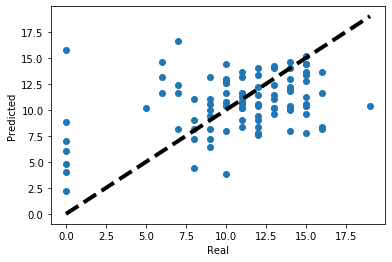

In [101]:
fig, ax = plt.subplots()
# рисуем синие точки, каждая точка - отдельный объект из тестовой выборки
ax.scatter(x=y_test, y=y_pred_regr)
# рисуем диагональ 
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
# подписываем оси
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

#### True and predicted values plot

Просто нарисуем для каждого объекта его реальное и предсказанное значение.

In [103]:
y_test_sorted = [tst for tst, pred in sorted(zip(y_test, y_pred_regr))]
y_pred_sorted = [pred for tst, pred in sorted(zip(y_test, y_pred_regr))]

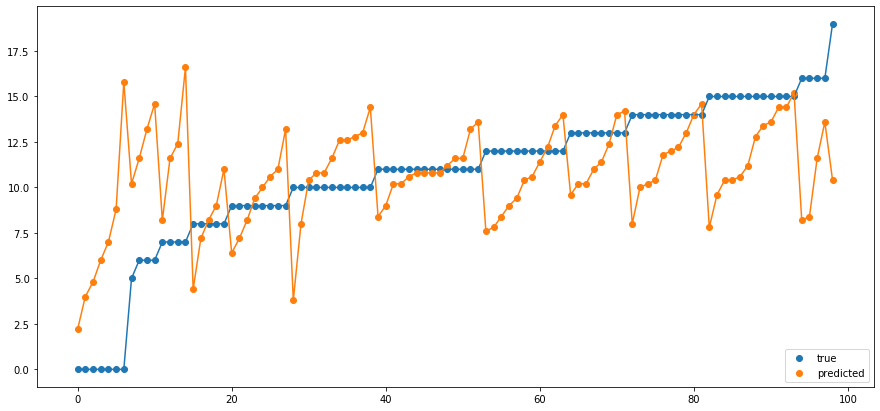

In [105]:
fig, ax = plt.subplots(figsize=(15, 7))

y_true = y_test_sorted
y_pred = y_pred_sorted

# рисуем точки соотвествующие каждому объекту
ax.scatter(x=range(0, len(y_true)), y=y_true, label='true')
ax.scatter(x=range(0, len(y_true)), y=y_pred, label='predicted')

# соединяем точки линией
ax.plot(range(0, len(y_true)),y_true)
ax.plot(range(0, len(y_true)), y_pred)

plt.legend(loc='lower right')

plt.show()

### Классификация

Будем предсказывать не конкретную оценку, а ее характеристику
+ exc 17-20
+ good - 13-16
+ sat - 8-12
+ fail - 0-7

In [106]:
def encode_grade(grade: float):
    if grade <= 7:
        return 'fail'
    if 8 <= grade <= 12:
        return 'sat'
    if 13 <= grade <= 16:
        return 'good'
    if 17 <= grade <= 20:
        return 'exc'

In [107]:
y_train_clf = [encode_grade(grade) for grade in y_train]
y_test_clf = [encode_grade(grade) for grade in y_test]

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
clf = KNeighborsClassifier()

In [110]:
clf.fit(X_train, y_train_clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [111]:
y_pred_clf = clf.predict(X_test)

In [112]:
from sklearn.metrics import classification_report, confusion_matrix

In [113]:
print(classification_report(y_test_clf, y_pred_clf))

              precision    recall  f1-score   support

         exc       0.00      0.00      0.00         1
        fail       0.31      0.27      0.29        15
        good       0.44      0.32      0.37        34
         sat       0.56      0.61      0.58        49

    accuracy                           0.45        99
   macro avg       0.33      0.30      0.31        99
weighted avg       0.47      0.45      0.46        99



#### Confusion matrix

In [114]:
print(confusion_matrix(y_test_clf, y_pred_clf, labels=['exc', 'good', 'sat', 'fail']))

[[ 0  0  1  0]
 [ 3 11 18  2]
 [ 2 10 30  7]
 [ 2  4  5  4]]


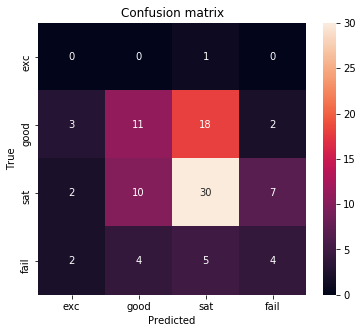

In [115]:
plt.figure(figsize=(6, 5)) # регулируем размер графика

sns.heatmap(confusion_matrix(y_test_clf, y_pred_clf, 
                             labels=['exc', 'good', 'sat', 'fail']), # таблица
            xticklabels=['exc', 'good', 'sat', 'fail'], # названия столбцов
            yticklabels=['exc', 'good', 'sat', 'fail'], # названия колонок
           annot=True) # подписать значения на цветных квадратиках
           
# добавляем название
plt.title('Confusion matrix', fontsize=12)

plt.ylabel('True') # true - строчки
plt.xlabel('Predicted') # predicted - столбцы

plt.show()

#### Самое шикарное - отобразить признаки в двумерное пространство и раскрасить в цвета классов

In [119]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [129]:
model = TSNE(n_components=2)

In [131]:
Z = model.fit_transform(X_test)

x_axis_2d = Z[:, 0]
y_axis_2d = Z[:, 1]

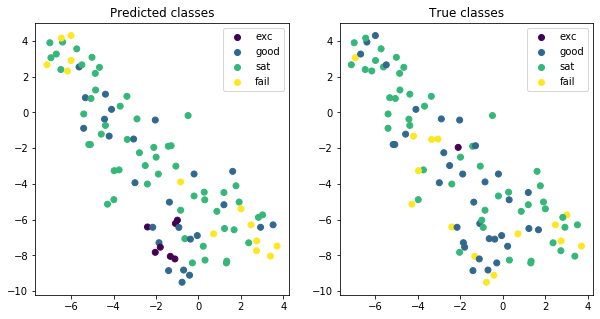

In [132]:
order = ['exc', 'good', 'sat', 'fail']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title('Predicted classes')
scatter = ax1.scatter(x_axis_2d, y_axis_2d, c=[order.index(i) for i in y_pred_clf])
legend = ax1.legend(*scatter.legend_elements()[:-1], order)

scatter2 = ax2.scatter(x_axis_2d, y_axis_2d, c=[order.index(i) for i in y_test_clf])
ax2.set_title('True classes')
legend = ax2.legend(*scatter2.legend_elements()[:-1], order)